#                     ML PHASE-2
 M.GOWTHAM
 
 AM.EN.U4CSE19234

# **Problem Definition:**

Given a user liked a movie in a particular platform, the goal is to 
predict the top 10 similar movies to be recommended in that 
platform.


# **Prepare Data**

data packages

**DATA EXPLORATION**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [ ]:
import os
import pandas as pd
import numpy as np


from collections import defaultdict


from collections import deque
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [ ]:
from pandas import read_csv
from google.colab import files
path = files.upload()
data=read_csv('Movies_List.csv')
print(data.shape)

Saving Movies_List.csv to Movies_List.csv
(777, 8)


In [ ]:
df=data
df.head(10)

,ID,Title,Year,IMDb,Rotten Tomatoes,Genres,Language,Runtime
0,1,The Irishman,2019,7.8,98/100,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4,97/100,"Action,Biography,Drama,Sport","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95/100,"Documentary,Biography",English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94/100,"Drama,Musical,Sport","Hindi,English",224.0
4,5,Roma,2018,7.7,94/100,"Action,Drama,History,Romance,War",English,52.0
5,6,To All the Boys I've Loved Before,2018,7.1,94/100,"Comedy,Drama,Romance",English,99.0
6,7,The Social Dilemma,2020,7.6,93/100,"Documentary,Drama",English,94.0
7,8,Okja,2017,7.3,92/100,"Action,Adventure,Drama,Sci-Fi","English,Korean,Spanish",120.0
8,9,The Ballad of Buster Scruggs,2018,7.3,92/100,"Comedy,Drama,Musical,Mystery,Romance,Western","English,French",133.0
9,10,The Trial of the Chicago 7,2020,7.8,92/100,"Drama,History,Thriller","English,Latin,French",129.0


In [ ]:
df=data.drop(labels='Rotten Tomatoes',axis=1)


In [ ]:
df.head(5)

,ID,Title,Year,IMDb,Genres,Language,Runtime
0,1,The Irishman,2019,7.8,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4,"Action,Biography,Drama,Sport","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0,"Documentary,Biography",English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1,"Drama,Musical,Sport","Hindi,English",224.0
4,5,Roma,2018,7.7,"Action,Drama,History,Romance,War",English,52.0


In [ ]:
data.describe(include='all')

,ID,Title,Year,IMDb,Rotten Tomatoes,Genres,Language,Runtime
count,777.000000,777,777.000000,777.000000,777,776,769,773.000000
unique,NaN,777,NaN,NaN,33,305,196,NaN
top,NaN,Special 26,NaN,NaN,67/100,Documentary,English,NaN
freq,NaN,1,NaN,NaN,70,41,377,NaN
mean,389.000000,NaN,2013.548263,6.940952,NaN,NaN,NaN,108.442432
std,224.444871,NaN,8.212735,0.780331,NaN,NaN,NaN,27.701235
min,1.000000,NaN,1954.000000,4.700000,NaN,NaN,NaN,4.000000
25%,195.000000,NaN,2011.000000,6.400000,NaN,NaN,NaN,93.000000
50%,389.000000,NaN,2017.000000,6.900000,NaN,NaN,NaN,105.000000
75%,583.000000,NaN,2018.000000,7.500000,NaN,NaN,NaN,122.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               777 non-null    int64  
 1   Title            777 non-null    object 
 2   Year             777 non-null    int64  
 3   IMDb             777 non-null    float64
 4   Rotten Tomatoes  777 non-null    object 
 5   Genres           776 non-null    object 
 6   Language         769 non-null    object 
 7   Runtime          773 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 48.7+ KB


In [ ]:
data.isna().sum()

ID                 0
Title              0
Year               0
IMDb               0
Rotten Tomatoes    0
Genres             1
Language           8
Runtime            4
dtype: int64

**Data visuallization**

• For visulaizing our data we use histogram plots, scatter plot, boxplot to know whether any outliers present in our data.

Text(0.5, 1.0, 'release year')

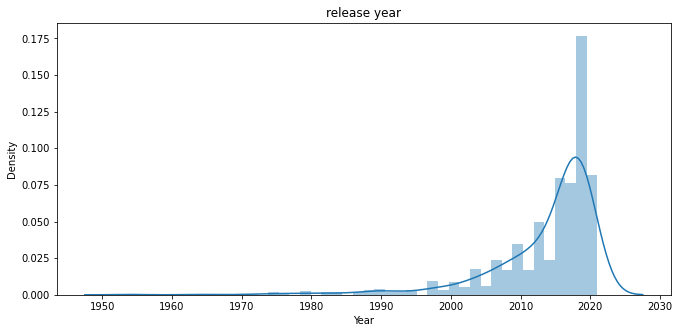

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(df['Year'])
plt.title('release year')

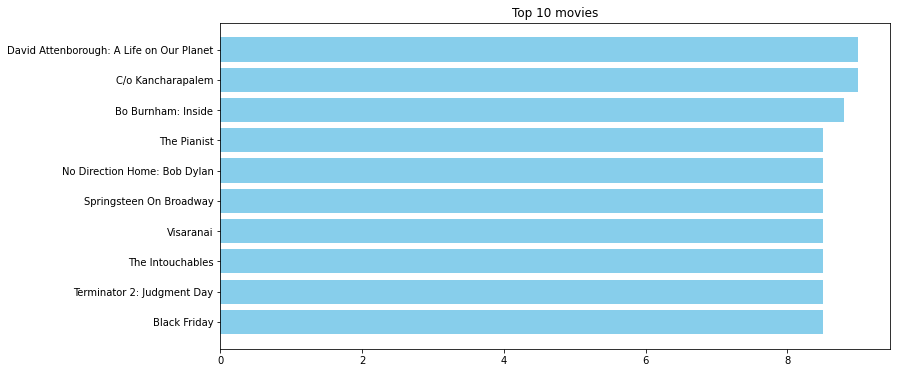

In [ ]:
# Plot top 10 movies
def plot():
  popularity = data.sort_values("IMDb", ascending=False)
  plt.figure(figsize=(12, 6))
  plt.barh(popularity["Title"].head(10), popularity["IMDb"].head(10), align="center", color="skyblue")
  plt.gca().invert_yaxis()
  plt.title("Top 10 movies")
plot()  

In [ ]:
data.duplicated().sum()

0

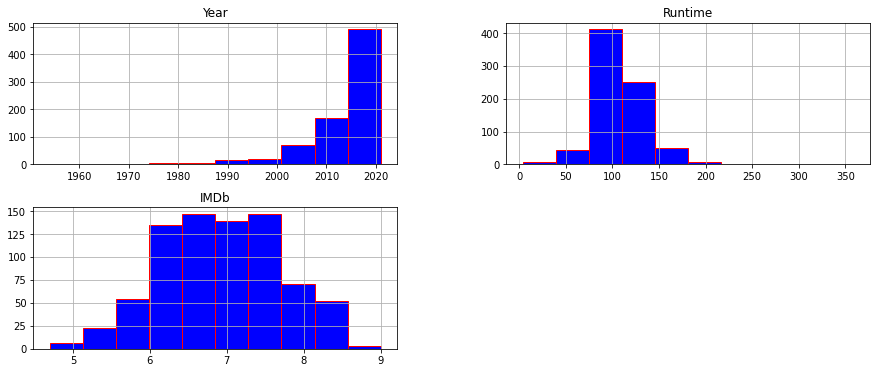

In [ ]:
numerical_attributes = ['Year', 'Runtime','IMDb']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

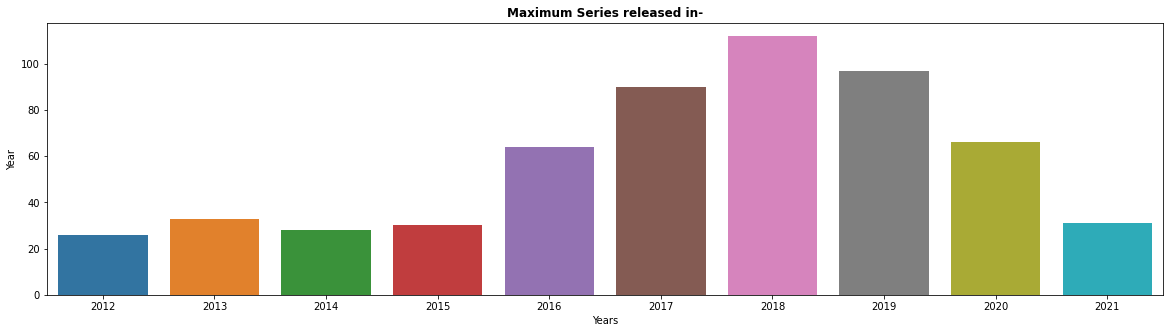

In [ ]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Year'].value_counts()[:10].index,y=data['Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()


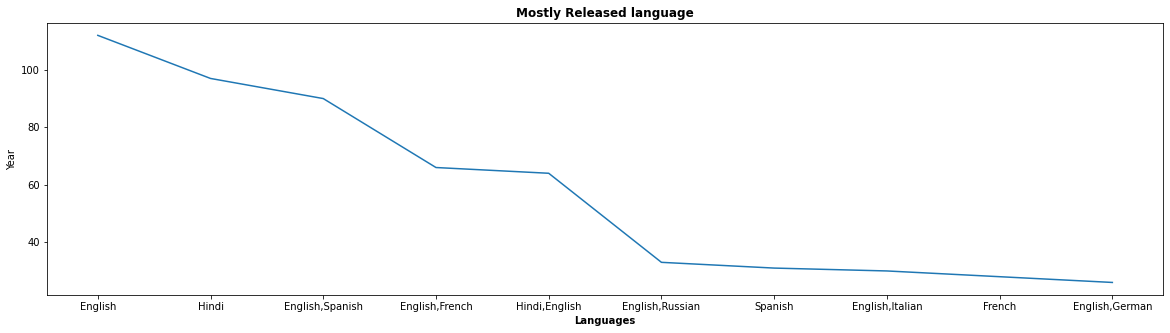

In [ ]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=data['Language'].value_counts()[:10].index,y=data['Year'].value_counts()[:10])
g.set_title("Mostly Released language", weight = "bold")
g.set_xlabel("Languages", weight = "bold")
plt.show()

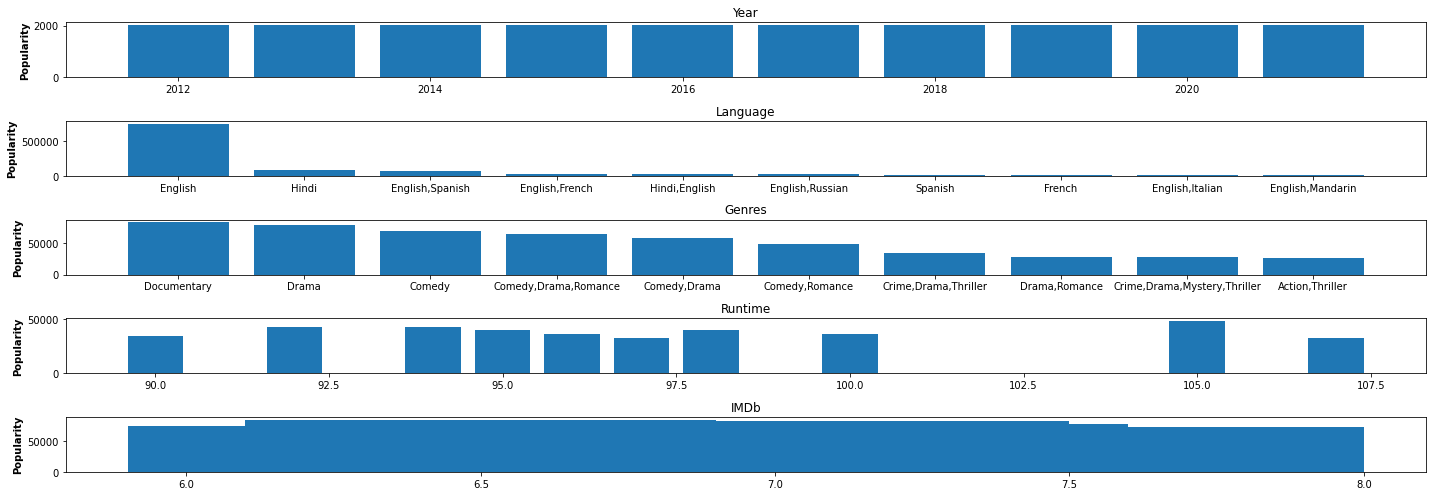

In [ ]:
Genre=['Year','Language','Genres','Runtime','IMDb']
fig,axs=plt.subplots(5,1,figsize=(20,7))
ax=0
for x in Genre:
    s=data.groupby([x]).sum().reset_index()
    d=s.sort_values(['Year'],ascending=False)[:10]
    axs[ax].bar(d[x],d['Year'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Popularity", weight = "bold")
    ax+=1
    plt.tight_layout()

In [ ]:
data.corr()

,ID,Year,IMDb,Runtime
ID,1.000000,0.036453,-0.431559,-0.125961
Year,0.036453,1.000000,-0.144554,-0.179244
IMDb,-0.431559,-0.144554,1.000000,0.229372
Runtime,-0.125961,-0.179244,0.229372,1.000000


In [ ]:
data.duplicated().sum()

0

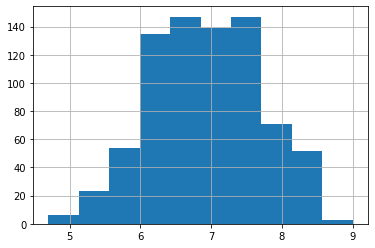

In [ ]:
df['IMDb'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c3916410>,
      dtype=object)

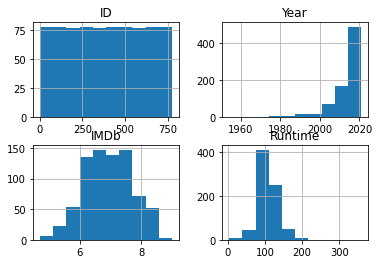

In [ ]:
df.hist()

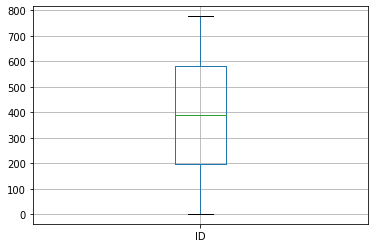

In [ ]:
df.boxplot('ID')

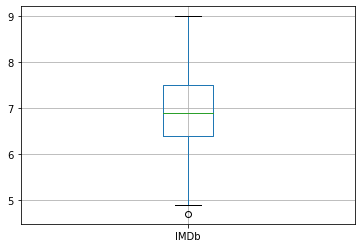

In [ ]:
df.boxplot('IMDb')

In [ ]:
def get_recommendations(Title):
    idx = data[Title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    df['clean_plot'] = df['Plot'].str.lower()

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie = [i[0] for i in sim_scores]
    return titles.iloc[movie]

In [ ]:
data['Year'] = pd.to_datetime(data['Year'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

# **cosine similarty**

Cosine similarity is the cosine of the angle between two n-dimensional vectors in an n-dimensional space We can use the Cosine Similarity algorithm to work out the similarity between two things. We might then use the computed similarity as part of a recommendation query. For example, to get movie recommendations based on the preferences of users who have given similar ratings to other movies that you’ve seen. The Cosine Similarity procedure computes similarity between all pairs of items. It is a symmetrical algorithm, which means that the result from computing the similarity of Item A to Item B is the same as computing the similarity of Item B to Item A. We can therefore compute the score for each pair of nodes once. We don’t compute the similarity of items to themselves.

In [ ]:
data['Genres'][0]

'Biography,Crime,Drama'

In [ ]:
df['clean_plot'] = df['Genres'].str.lower()

In [ ]:
df['clean_plot']

0                        biography,crime,drama
1                 action,biography,drama,sport
2                        documentary,biography
3                          drama,musical,sport
4             action,drama,history,romance,war
                        ...                   
772    biography,drama,horror,mystery,thriller
773                              drama,romance
774                  action,drama,family,sport
775       crime,drama,mystery,romance,thriller
776                          documentary,music
Name: clean_plot, Length: 777, dtype: object

In [ ]:
df.head()

,ID,Title,Year,IMDb,Genres,Language,Runtime,clean_plot
0,1,The Irishman,2019,7.8,"Biography,Crime,Drama","English,Italian,Latin,Spanish,German",209.0,"biography,crime,drama"
1,2,Dangal,2016,8.4,"Action,Biography,Drama,Sport","Hindi,English",161.0,"action,biography,drama,sport"
2,3,David Attenborough: A Life on Our Planet,2020,9.0,"Documentary,Biography",English,83.0,"documentary,biography"
3,4,Lagaan: Once Upon a Time in India,2001,8.1,"Drama,Musical,Sport","Hindi,English",224.0,"drama,musical,sport"
4,5,Roma,2018,7.7,"Action,Drama,History,Romance,War",English,52.0,"action,drama,history,romance,war"


In [ ]:

df['IMDb'] = df['IMDb']
df['Genres'] = df['Genres']
df['Language'] = df['Language']

In [ ]:
columns = ['Genres']
l = []
words = df['Title']
for i in range(len(df)):
  value = ''
  for col in columns:
    value= (df[col][i])
  l.append(words)
l

KeyError: ignored

### cosine simlarity implementation

In [ ]:

df = df[['Title', 'clean_plot']]


In [ ]:
df.head(5)

,Title,clean_plot
0,The Irishman,"biography,crime,drama"
1,Dangal,"action,biography,drama,sport"
2,David Attenborough: A Life on Our Planet,"documentary,biography"
3,Lagaan: Once Upon a Time in India,"drama,musical,sport"
4,Roma,"action,drama,history,romance,war"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['clean_plot'].values.astype('U'))
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

[[1.         0.4727949  0.52029545 ... 0.09034569 0.39094188 0.        ]
 [0.4727949  1.         0.38538843 ... 0.70430372 0.07408265 0.        ]
 [0.52029545 0.38538843 1.         ... 0.         0.         0.42454009]
 ...
 [0.09034569 0.70430372 0.         ... 1.         0.07266756 0.        ]
 [0.39094188 0.07408265 0.         ... 0.07266756 1.         0.        ]
 [0.         0.         0.42454009 ... 0.         0.         1.        ]]


In [ ]:
index = pd.Series(df['Title'])

In [ ]:
index.head()

0                                The Irishman
1                                      Dangal
2    David Attenborough: A Life on Our Planet
3           Lagaan: Once Upon a Time in India
4                                        Roma
Name: Title, dtype: object

In [ ]:
def recommend_movies(title):
  movies = []
  idx = index[index == title].index[0]
  score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
  top10 = list(score.iloc[1:11].index)
  for i in top10:
     movies.append(df['Title'][i])
  return movies

In [ ]:
#These are the Top 10 Movie recomendation
recommend_movies('The Irishman')

['Kill the Irishman',
 'Snowden',
 'Legend',
 'Extremely Wicked, Shockingly Evil and Vile',
 'Fruitvale Station',
 'The Butler',
 'Dovlatov',
 'The Social Network',
 'On My Skin',
 'The Professor and the Madman']

Linear kernal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel

In [ ]:
lin_sim_count = linear_kernel(features, features)

In [ ]:
def recommended_movies(title):
  movies = []
  idx = index[index == title].index[0]
  score = pd.Series(lin_sim_count[idx]).sort_values(ascending=False)
  top10 = list(score.iloc[1:11].index)
  for i in top10:
    movies.append(df['Title'][i])
  return movies

In [ ]:
recommended_movies('The Irishman')


['Kill the Irishman',
 'Snowden',
 'Legend',
 'Extremely Wicked, Shockingly Evil and Vile',
 'Fruitvale Station',
 'The Butler',
 'Dovlatov',
 'The Social Network',
 'On My Skin',
 'The Professor and the Madman']

In [ ]:
recommend_movies('Dovlatov')

['On My Skin',
 'The Founder',
 "At Eternity's Gate",
 'The Butler',
 'The Social Network',
 'The Professor and the Madman',
 'Steve Jobs',
 'Brain on Fire',
 'Miles Davis: Birth of the Cool',
 'Philomena']

Sigmoid function

In [ ]:
sig_matrix = sigmoid_kernel(features, features)

In [ ]:
def movies(title):
  movies = []
  idx = index[index == title].index[0]
  score = pd.Series(sig_matrix[idx]).sort_values(ascending=False)
  top10 = list(score.iloc[1:11].index)
  for i in top10:
    movies.append(df['Title'][i])
  return movies


In [ ]:
recommend_movies('The Irishman')

['Kill the Irishman',
 'Snowden',
 'Legend',
 'Extremely Wicked, Shockingly Evil and Vile',
 'Fruitvale Station',
 'The Butler',
 'Dovlatov',
 'The Social Network',
 'On My Skin',
 'The Professor and the Madman']

In [ ]:
recommend_movies('The Professor and the Madman')

['On My Skin',
 'The Founder',
 "At Eternity's Gate",
 'The Butler',
 'The Social Network',
 'The Professor and the Madman',
 'Steve Jobs',
 'Brain on Fire',
 'Miles Davis: Birth of the Cool',
 'Philomena']